The MIT License (MIT)<br>
Copyright (c) 2018 Massachusetts Institute of Technology<br>

Author: Cody Rude<br>
This software has been created in projects supported by the US National<br>
Science Foundation and NASA (PI: Pankratius)<br>

Permission is hereby granted, free of charge, to any person obtaining a copy<br>
of this software and associated documentation files (the "Software"), to deal<br>
in the Software without restriction, including without limitation the rights<br>
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell<br>
copies of the Software, and to permit persons to whom the Software is<br>
furnished to do so, subject to the following conditions:<br>

The above copyright notice and this permission notice shall be included in<br>
all copies or substantial portions of the Software.<br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR<br>
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,<br>
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE<br>
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER<br>
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,<br>
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN<br>
THE SOFTWARE.<br>

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [3]:
import pandas as pd

In [4]:
# LA Traffic count data between 2014-01-14 and 2014-01-16
# Source: https://data.lacity.org/A-Livable-and-Sustainable-City/LADOT-Traffic-Counts-Summary/94wu-3ps3

In [5]:
from skdaccess.engineering.la.traffic_counts.stream import DataFetcher as TrafficDF
from skdaccess.framework.param_class import *

In [6]:
# Create traffic count data fetcher
# Note, use paramter app_token to supply an application token to prevent throttling
# See: https://dev.socrata.com/docs/app-tokens.html
traffic_df = TrafficDF(start_time='2014-01-14', end_time='2014-01-16')

In [7]:
# Create a data wapper
traffic_dw = traffic_df.output()

In [8]:
# Retrieve results
label, data = next(traffic_dw.getIterator())

In [9]:
# Select rows with east bound traffic on 2014-01-14
date = pd.to_datetime('2014-01-14')
cut_data = data[data.count_date == date]
cut_data = cut_data[cut_data.e_b != 0]

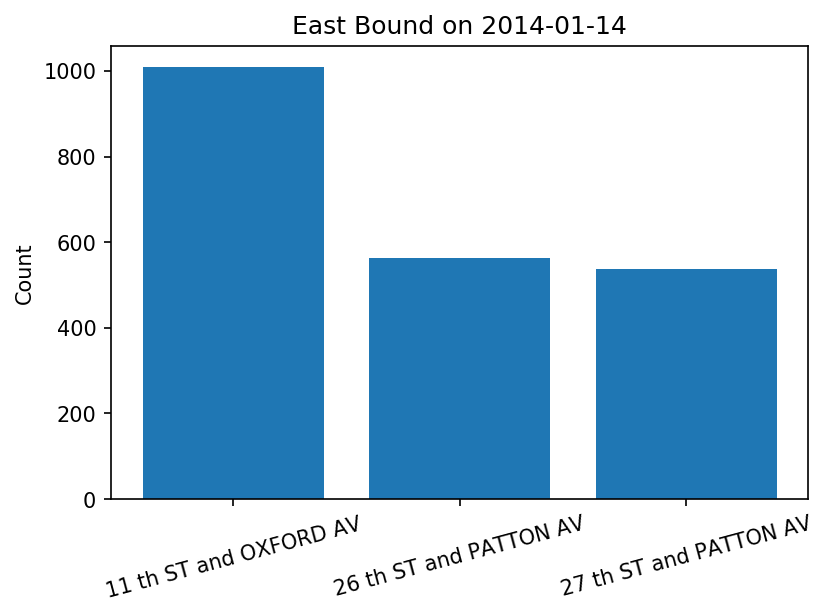

In [10]:
# Create plot
plt.title('East Bound on {}'.format(date.strftime('%Y-%m-%d')));
plt.ylabel('Count');
tick_labels = cut_data.primary_street + ' and ' + cut_data.cross_street
plt.bar(x=range(1,4), height=cut_data.e_b, tick_label=tick_labels);
plt.xticks(rotation=15);